# Starter Classes

These are classes that will be used throughout the project. 

In [1]:
#All neccesary classes for project

#general
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as ss

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores

import matplotlib.pyplot as plt

# Import Data

Here we will import the data, view it, and scale it as well as impute missing values

In [9]:
#Get Data

raw_data = import_data("Out_Of_Set_Test_Run_2.csv", "C:/Users/sdgeo/Dropbox/Own/Graduate-School/First_Semester/COMP_790/workspace/out_of_sample")
cleaned_data = raw_data.drop(['Unnamed: 0'], axis=1)
unblurred_data = cleaned_data.loc[cleaned_data['Correct_Confidence'] == 0].reset_index().drop(['index'], axis=1)
blurred_data = cleaned_data.loc[cleaned_data['Correct_Confidence'] == 1].reset_index().drop(['index'], axis=1)
classfier_compare = unblurred_data.iloc[:,[4,6]]
blur_compare = blurred_data.iloc[:,[4,6]]
confidence_compare = cleaned_data.iloc[:,[8,10]]
unblurred_data.to_csv('Unblurred_Data_Compare.csv', sep=',')
cleaned_data

,Item_Number,file,Correct_Category,Correct_Softmax_Value,Correct_Softmax_Index,Estimated_Category,Estimated_Category_Index,Estimated_Category_Strength,Max_Confidence_Index_Value,Calculated_Confidence,Correct_Confidence,Confidence_Score
0,0,ILSVRC2012_val_00000574.jpeg,ice cream,0.001014,928,"ballpoint, ballpoint pen, ballpen, Biro",418,0.019951,1,0.582499,1,0.417501
1,1,ILSVRC2012_val_00001162.jpeg,red-backed sandpiper,0.005612,140,nail,677,0.020700,1,0.889986,1,0.110014
2,2,ILSVRC2012_val_00000800.JPEG,standard poodle,0.444317,267,standard poodle,267,0.444317,0,0.857631,0,0.857631
3,3,ILSVRC2012_val_00000028.jpeg,English foxhound,0.001973,167,nail,677,0.009556,1,0.815436,1,0.184565
4,4,ILSVRC2012_val_00000578.JPEG,dugong,0.887395,149,"dugong, Dugong dugon",149,0.887395,0,0.894668,0,0.894668
5,5,ILSVRC2012_val_00000529.jpeg,scuba diver,0.000645,983,nail,677,0.012962,1,0.809995,1,0.190005
6,6,ILSVRC2012_val_00000271.jpeg,steel arch bridge,0.000280,821,"lens cap, lens cover",622,0.025275,1,0.871586,1,0.128414
7,7,ILSVRC2012_val_00000088.jpeg,spotted salamander,0.001472,28,black grouse,80,0.085883,1,0.831289,1,0.168711
8,8,ILSVRC2012_val_00000853.jpeg,moped,0.000462,665,black grouse,80,0.023117,1,0.875366,1,0.124634
9,9,ILSVRC2012_val_00000050.jpeg,sturgeon,0.000277,394,shower curtain,794,0.043040,1,0.685188,1,0.314812


# Ready for Plotting and Graphing

Here you can use can visualize data and do any number of correlation matricies etc. 

Cleaned data item:
cleaned_data

In [3]:

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
Item_Number                    3000 non-null int64
file                           3000 non-null object
Correct_Category               3000 non-null object
Correct_Softmax_Value          3000 non-null float64
Correct_Softmax_Index          3000 non-null int64
Estimated_Category             3000 non-null object
Estimated_Category_Index       3000 non-null int64
Estimated_Category_Strength    3000 non-null float64
Max_Confidence_Index_Value     3000 non-null int64
Calculated_Confidence          3000 non-null float64
Correct_Confidence             3000 non-null int64
Confidence_Score               3000 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 281.3+ KB


In [4]:
cleaned_data.describe()

,Item_Number,Correct_Softmax_Value,Correct_Softmax_Index,Estimated_Category_Index,Estimated_Category_Strength,Max_Confidence_Index_Value,Calculated_Confidence,Correct_Confidence,Confidence_Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,0.345906,493.047333,456.262333,0.422267,0.478000,0.795518,0.500000,0.516403
std,866.169729,0.403201,291.079658,299.781991,0.378500,0.499599,0.086852,0.500083,0.307627
min,0.000000,0.000050,0.000000,1.000000,0.008496,0.000000,0.501379,0.000000,0.056952
25%,749.750000,0.000840,245.750000,128.750000,0.032851,0.000000,0.760481,0.000000,0.181689
50%,1499.500000,0.012569,478.000000,481.000000,0.331481,0.000000,0.810761,0.500000,0.686339
75%,2249.250000,0.832429,746.000000,677.000000,0.837110,1.000000,0.855642,1.000000,0.807689
max,2999.000000,0.998380,999.000000,999.000000,0.998380,1.000000,0.953119,1.000000,0.953119


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data.hist(bins=50, figsize=(150,130))
plt.savefig('hist_2.jpeg')
plt.show()

In [7]:
corr_matrix = cleaned_data.corr()

In [8]:
corr_matrix_spear = cleaned_data.corr(method='spearman')
corr_matrix_spear.reindex(sorted(corr_matrix_spear.columns), axis=1)
pvalue_matrix_spear = pd.DataFrame(ss.spearmanr(cleaned_data).pvalue)
corr_matrix_spear

c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,Item_Number,Correct_Softmax_Value,Correct_Softmax_Index,Estimated_Category_Index,Estimated_Category_Strength,Max_Confidence_Index_Value,Calculated_Confidence,Correct_Confidence,Confidence_Score
Item_Number,1.000000,0.018935,0.001542,0.012638,0.023077,-0.022146,-0.003785,-0.020919,0.028142
Correct_Softmax_Value,0.018935,1.000000,-0.074730,0.085730,0.838749,-0.803626,-0.076667,-0.822348,0.759970
Correct_Softmax_Index,0.001542,-0.074730,1.000000,0.541952,-0.025714,-0.010469,-0.048702,0.000000,0.034947
Estimated_Category_Index,0.012638,0.085730,0.541952,1.000000,0.061277,-0.151458,-0.204031,-0.132081,0.212477
Estimated_Category_Strength,0.023077,0.838749,-0.025714,0.061277,1.000000,-0.851977,-0.075086,-0.851557,0.797414
Max_Confidence_Index_Value,-0.022146,-0.803626,-0.010469,-0.151458,-0.851977,1.000000,0.076741,0.955592,-0.865187
Calculated_Confidence,-0.003785,-0.076667,-0.048702,-0.204031,-0.075086,0.076741,1.000000,0.010278,-0.106590
Correct_Confidence,-0.020919,-0.822348,0.000000,-0.132081,-0.851557,0.955592,0.010278,1.000000,-0.864594
Confidence_Score,0.028142,0.759970,0.034947,0.212477,0.797414,-0.865187,-0.106590,-0.864594,1.000000


In [ ]:

#color pallete used for all heatmaps
pls = sns.husl_palette(8, s=.45)

#overall cluster map
dims = (100, 100)
sns_whole = sns.clustermap(corr_matrix_spear, figsize=dims, cmap="vlag")
sns_whole.savefig("correlation_map.png", dpi = 'figure')

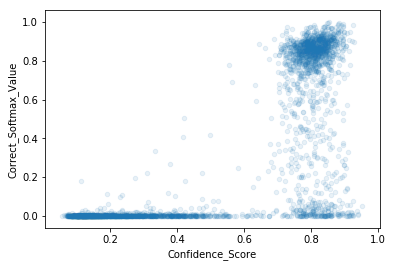

In [54]:
%matplotlib inline
cleaned_data.plot(kind="scatter", x="Confidence_Score", y="Correct_Softmax_Value", alpha=0.1)
plt.savefig('Correlation_Correct_Softmax.jpeg')
plt.show()

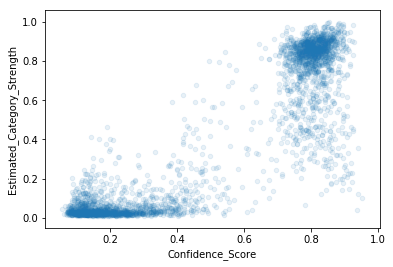

In [55]:
%matplotlib inline
cleaned_data.plot(kind="scatter", x="Confidence_Score", y="Estimated_Category_Strength", alpha=0.1)
plt.savefig('Correlation_Strongest_Category.jpeg')
plt.show()

In [34]:
confidence_compare

,Max_Confidence_Index_Value,Correct_Confidence
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [5]:
#Calculate Classifier Accuracy

confidence_matrix = classfier_compare.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, 1500,0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,1500,0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.82

In [6]:
#Calculate in/out Accuracy

confidence_matrix = confidence_compare.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, 3000,0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,3000,0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.9773333333333334

In [11]:
#Calculate in/out Accuracy

confidence_matrix = blur_compare.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, 1500,0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,1500,0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.021333333333333333